In [1]:
import sympy 
import cvxpy as cvx

x,y = sympy.symbols('x y') 

fun = (-x**2-3*x+4)*(-y**2+y+12)
fun2 = lambda a,b: (-a**2-3*a+4)*(-b**2+b+12)
fun_x = fun.diff(x)
fun_y = fun.diff(y)

display(fun_x)
display(fun_y)

result = sympy.solve([fun_x,fun_y],[x,y])
display(result)

for r in result:
    print(fun2(r[0], r[1]))

# здесь не было учтено условие граничных точек

(-2*x - 3)*(-y**2 + y + 12)

(1 - 2*y)*(-x**2 - 3*x + 4)

[(-4, -3), (-4, 4), (-3/2, 1/2), (1, -3), (1, 4)]

0
0
1225/16
0
0


In [4]:
# Задание 2

x,y = sympy.symbols('x y') 

fun = (-x**2-3*x+4)*(-y**2+y+12)
fun2 = lambda a,b: (-a**2-3*a+4)*(-b**2+b+12)

fun_x = fun.diff(x)
fun_y = fun.diff(y)

display(fun_x)
display(fun_y)

# нашли точки экстремумов
result = sympy.solve([fun_x,fun_y],[x,y])
display(result)

# находим значения частных производных второго порядка в точках
def get_global(a,b):
    sub_s={x:a,y:b}
    aa = fun.diff(x).diff(x).evalf(subs=sub_s)
    bb = fun.diff(y).diff(y).evalf(subs=sub_s)
    cc = fun.diff(x).diff(y).evalf(subs=sub_s)

    if ((aa*bb-cc**2)>0) and aa<0:
        print(a,b,'максимум',fun2(a,b))
    elif ((aa*bb-cc**2)>0) and aa>0:
        print(a,b,'минимум',fun2(a,b))
    elif ((aa*bb-cc**2)<0):
        print(a,b,'нет',fun2(a,b))
    else:
        print('хз',fun2(a,b))


for r in result:
    get_global(r[0], r[1])

(-2*x - 3)*(-y**2 + y + 12)

(1 - 2*y)*(-x**2 - 3*x + 4)

[(-4, -3), (-4, 4), (-3/2, 1/2), (1, -3), (1, 4)]

-4 -3 нет 0
-4 4 нет 0
-3/2 1/2 максимум 1225/16
1 -3 нет 0
1 4 нет 0


In [33]:
x,y = sympy.symbols('x y') 

fun = 2*x*y*(3-x-y)
fun2 = lambda a,b: (2*a*b*(3-a-b))
fun_x = fun.diff(x)
fun_y = fun.diff(y)

display(fun_x)
display(fun_y)

# нашли точки экстремумов
result = sympy.solve([fun_x,fun_y],[x,y])
display(result)

# находим значения частных производных второго порядка в точках
def get_global(a,b):
    sub_s={x:a,y:b}
    aa = fun.diff(x).diff(x).evalf(subs=sub_s)
    bb = fun.diff(y).diff(y).evalf(subs=sub_s)
    cc = fun.diff(x).diff(y).evalf(subs=sub_s)

    if ((aa*bb-cc**2)>0) and aa<0:
        print(a,b,'максимум',fun2(a,b))
    elif ((aa*bb-cc**2)>0) and aa>0:
        print(a,b,'минимум',fun2(a,b))
    elif ((aa*bb-cc**2)<0):
        print(a,b,'нет',fun2(a,b))
    else:
        print('хз',fun2(a,b))


for r in result:
    get_global(r[0], r[1])

-2*x*y + 2*y*(-x - y + 3)

-2*x*y + 2*x*(-x - y + 3)

[(0, 0), (0, 3), (1, 1), (3, 0)]

0 0 нет 0
0 3 нет 0
1 1 максимум 2
3 0 нет 0


In [35]:
fun2(2.5,2.5)

-25.0

In [13]:
x,y = sympy.symbols('x y') 

fun = 5*x -16*y + 2
fun2 = lambda a,b: (5*a -16*b + 2)
fun_x = fun.diff(x)
fun_y = fun.diff(y)

display(fun_x)
display(fun_y)

result = sympy.solve([fun_x,fun_y],[x,y])
display(result)

# for r in result:
#     print(fun2(r[0], r[1]))

5

-16

[]

In [23]:
from scipy.optimize import minimize
import numpy as np

e = 1e-10 # Очень близко к 0

fun = lambda x : (-x[0]**2 - 3*x[0] + 4)*(-x[1]**2 + x[1] + 12) 
fun2 = lambda x : -(-x[0]**2 - 3*x[0] + 4)*(-x[1]**2 + x[1] + 12) 

cons = ({'type': 'ineq', 'fun': lambda x: x[0] - e}, # x> = e эквивалентно x> 0
        {'type': 'ineq', 'fun': lambda x: x[1] - e},
        {'type': 'ineq', 'fun': lambda x: x[0] - 4 - e},
        {'type': 'ineq', 'fun': lambda x: x[1] - 7 - e}
       )
x0 = np.array((1.0, 1.0)) # Установить начальное значение
res = minimize(fun, x0, method='SLSQP', constraints=cons)

print('Максимальное значение:',res.fun)
print('Оптимальное решение:',res.x)
print('Успешно ли завершение итерации:', res.success)
print('Причина прекращения итерации:', res.message)

Максимальное значение: 720.0000004129952
Оптимальное решение: [4. 7.]
Успешно ли завершение итерации: True
Причина прекращения итерации: Optimization terminated successfully


In [24]:
x0 = np.array((1.0, 1.0)) # Установить начальное значение
res = minimize(fun2, x0, method='SLSQP', constraints=cons)

print('Максимальное значение:',res.fun)
print('Оптимальное решение:',res.x)
print('Успешно ли завершение итерации:', res.success)
print('Причина прекращения итерации:', res.message)

Максимальное значение: -inf
Оптимальное решение: [3.80111915e+121 4.45806541e+121]
Успешно ли завершение итерации: False
Причина прекращения итерации: Singular matrix E in LSQ subproblem


C:\Users\Gorun\AppData\Local\Temp/ipykernel_15712/4011774608.py:7: RuntimeWarning: overflow encountered in double_scalars
  fun2 = lambda x : -(-x[0]**2 - 3*x[0] + 4)*(-x[1]**2 + x[1] + 12)


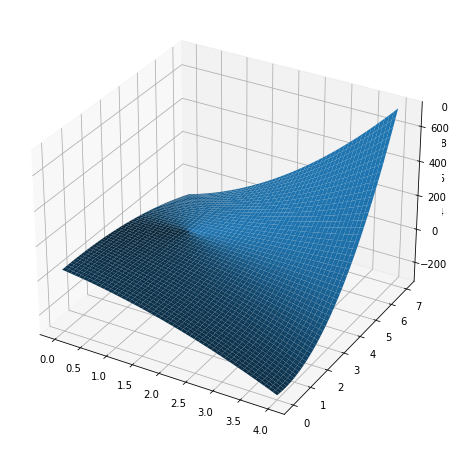

In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

#create 3d axes
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')

#function for Z values
# def f(x, y): 
#     return np.cos(np.sqrt(x ** 2 + y ** 2)) 
  
# x and y values 
x = np.linspace(0, 4, 1000) 
y = np.linspace(0, 7, 1000) 
  
X, Y = np.meshgrid(x, y) 
Z = fun2(X, Y) 
  
ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z)

plt.show()

In [10]:
print(Z.max()+Z.min())

426.0001503004506


In [32]:
fun((4, 7)) + fun((4, 0))

432

-288

In [31]:
fun((0, 7))

-120

In [11]:
fun2 = lambda x,y: 2*x*y*(3-x-y)

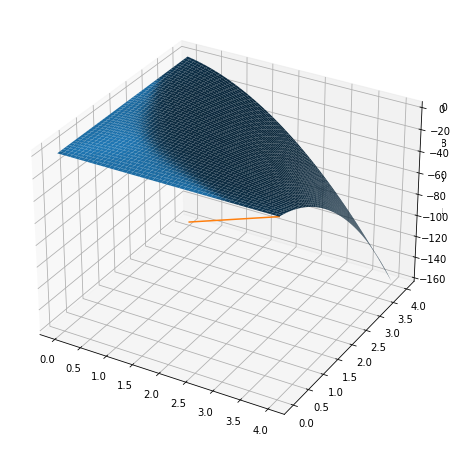

In [28]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

#create 3d axes
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')

#function for Z values
# def f(x, y): 
#     return np.cos(np.sqrt(x ** 2 + y ** 2)) 
  
# x and y values 
x = np.linspace(0, 4, 1000) 
y = np.linspace(0, 4, 1000) 
# Z2 = np.linspace(-160,0,1000)
  
X, Y = np.meshgrid(x, y) 
Z = fun2(X, Y) 

  
ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z)
ax.plot3D(x,4-x,Z2)

plt.show()

In [31]:
Z.max()

1.9999939839699516

In [32]:
Z.min()

-160.0

In [38]:
import numpy as np
import cvxpy as cvx

# # наши независимые переменные
# x,y = cvx.Variable(2)
# constraints = [
#     x + y <= 4,
#     x>=0,
#     y>=0
#  ]
# # целевая функция и что с ней делать
# obj = cvx.Minimize(2*x*y*(3-x-y))
# # формулируем задачу и решаем
# prob = cvx.Problem(obj, constraints)
# prob.solve()
x,y,Lamb = sympy.symbols('x y Lamb')

fun = 2*x*y*(3-x-y) + Lamb*(x + y - 4) 
fun_x = fun.diff(x)
fun_y = fun.diff(y)
fun_Lamb = fun.diff(Lamb)

display(fun_x)
display(fun_y)
display(fun_Lamb)

sympy.solve([fun_x,fun_y,fun_Lamb],[x,y,Lamb])

Lamb - 2*x*y + 2*y*(-x - y + 3)

Lamb - 2*x*y + 2*x*(-x - y + 3)

x + y - 4

[(2, 2, 12)]

In [39]:
2*2*2*(3-2-2)

-8

In [40]:
2*2.5*1.5*(3-2.5-1.5)

-7.5

In [41]:
2*2.7*1.3*(3-2.7-1.3)

-7.020000000000002

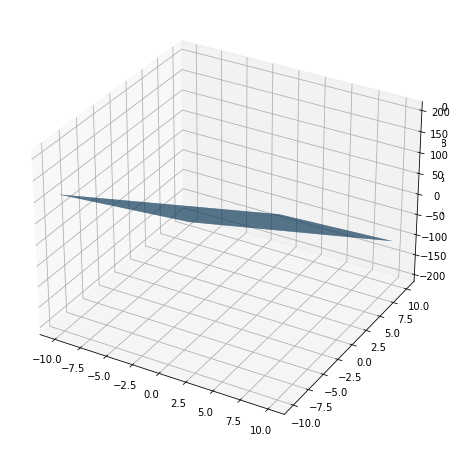

In [44]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

#create 3d axes
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')

#function for Z values
def fun2(x, y): 
    return 5*x-16*y+2

def fun3(x,y):
    return 5*x**2+8*y**2-37
  
# x and y values 
x = np.linspace(-10, 10, 1000) 
y = np.linspace(-10, 10, 1000) 
# Z2 = np.linspace(-160,0,1000)
  
X, Y = np.meshgrid(x, y) 
Z = fun2(X, Y) 
Z3 = fun3(X, Y) 

  
ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z)
# ax.plot_wireframe(X, Y, Z3)

plt.show()

In [51]:
import numpy as np
import cvxpy as cvx

x,y,Lamb,z = sympy.symbols('x y Lamb z')

fun = 5*x - 16*y + 2 + Lamb*(5*x**2 + 8*y**2 - 37 + z**2) 
fun_x = fun.diff(x)
fun_y = fun.diff(y)
fun_Lamb = fun.diff(Lamb)
fun_z = fun.diff(z)


display(fun_x)
display(fun_y)
display(fun_Lamb)
display(fun_z)

result = sympy.solve([fun_x,fun_y,fun_Lamb,z],[x,y,Lamb,z])
result

10*Lamb*x + 5

16*Lamb*y - 16

5*x**2 + 8*y**2 + z**2 - 37

2*Lamb*z

[(-1, 2, 1/2, 0), (1, -2, -1/2, 0)]

In [50]:
result[0][0]

sqrt(37)*sqrt(-1/(xi**2 - 37))*(37 - xi**2)/37

In [52]:
fun4 = lambda x,y: 5*x - 16*y + 2

fun4(-1,2)

-35

In [53]:
fun4(1,-2)

39

In [54]:
39+35

74

In [58]:
5*(1)**2 + 8*(-2)**2

37